In [101]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [61]:
#importing data from csv files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [62]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
#Analyze by pivoting features ---> the higher the number means more correlation with the target
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)

      Sex  Survived
0  female  0.742038
1    male  0.188908
____________________


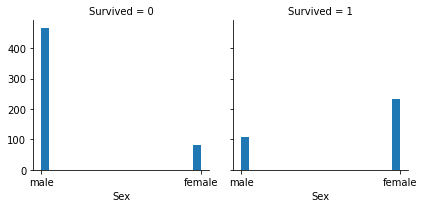

In [64]:
#Analyze by visualizing data , Correlating numerical features
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

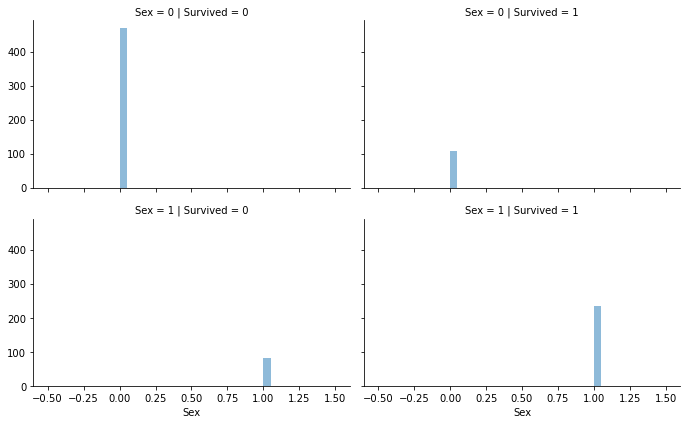

In [98]:
#Correlating categorical features
gridView = sns.FacetGrid(train_df, col='Survived', row='Sex',  aspect=1.6)
gridView.map(plt.hist, 'Sex', alpha=.5, bins=20)
gridView.add_legend();

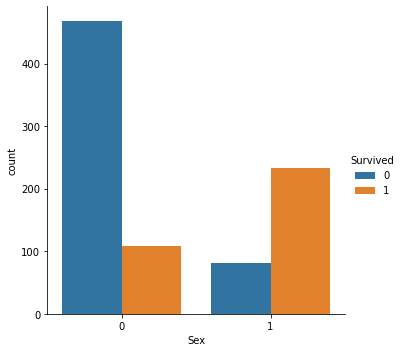

In [99]:
#Countplot for Sex and Survived
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train_df)

In [70]:
#Correcting by dropping features
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
#Creating new feature by extracting from existing
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#Creating new feature extracting from existing
for dataset in combine:
     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
#We can convert the categorical titles to ordinal        
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
#Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId    
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
#Converting a categorical feature
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
#filling null values for Embarked with most common value    
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
#calculating mean and filling null fields with mean of ages column    
meanAge = int(train_df.Age.dropna().mean())
print('Mean Age = ', meanAge)

for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

Mean Age =  29


In [71]:
train_df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.560236,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.005010,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000


In [82]:
#Writing data to train_preprocessed.cvs and test_preprocessed.cvs
combine[0].to_csv('train_preprocessed.csv',index=False)
combine[1].to_csv('test_preprocessed.csv',index=False)

In [83]:
#Reading Data from csv files
df_train = pd.read_csv('train_preprocessed.csv')
df_test = pd.read_csv('test_preprocessed.csv')
print(train_df.isnull().sum())
print('-'*10)
print(test_df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64


In [84]:
#appending train and test data
titanic_df = df_train.append(df_test, sort=False)

C:\Users\mohan\AppData\Local\Temp\ipykernel_10008\2894352362.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = df_train.append(df_test, sort=False)


In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#Assigning values to x and y
x = train_df.drop("Survived",axis=1)
y = train_df["Survived"]
#splitting data to test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [87]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       110
           1       0.71      0.77      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[88 22]
 [16 53]]
accuracy is 0.7877094972067039
